In [1]:
from pyIClab import (
    IonChromatograph, Eluent, SwitchingValve,
    SampleLoop, Dummy, QuickSuppressor, Detector,
    )

from pyIClab import __version__ as pyIClab__version__


In [2]:
# Create accessories for a basic IC system
# An IC pump (Eluent)
# A six-port valve
# A 25-uL sample loop
eluent = Eluent.HydroxideIsocratic('18 mM')
valve = SwitchingValve.SixPort()
loop = SampleLoop('loop', V='25 uL')

# Here we use a built-in column initializer with
# a primitive stationary phase database
column = Dummy.Column()

# pyIClab provides several suppressor implementions
# Here is the very simplest one.
# Visit pyIClab.assemblies.signals to get more...
suppressor = QuickSuppressor('suppressor', kind='anion')
# Of course don't forget the detector
detector = Detector('detector')

In [3]:
# Install and assemble all the accessories
# I bet you have done it a lot.
valve.assemble(0, eluent)
valve.assemble(1, column)
valve.assemble([2, 5], loop)
column.assemble(suppressor)
suppressor.assemble(detector)

In [4]:
# Now we are able to build up a basic IC system.
# lockon=valve means when you are getting access to the
# IC system, pyIClab will find all the accessories by starting
# with the valve. All the accessories which may trace back to
# the valve will be included to the IC system.
ic = IonChromatograph('SimpleIC', competing_ions=('OH-',), lockon=valve)

# Let's have a look at the IC modules
ic.modules

{<Column "Dummy" (4.6 × 150 mm)>,
 <Detector "detector">,
 <Eluent "KOH" Isocratic(OH[-1]: 18.0 mM, K[+1]: 18.0 mM) in 10 min>,
 <Loop "loop" 25 μL>,
 <Suppressor "suppressor">,
 <Valve "SixPort">}

In [5]:
# Through IC's namespace we are able to see all the unique
# accessories in the IC system that we can manipulate.
ic.namespace

,type_identifier,name,module_instance
0,column,Dummy,"<Column ""Dummy"" (4.6 × 150 mm)>"
1,detector,detector,"<Detector ""detector"">"
2,eluent,KOH,"<Eluent ""KOH"" Isocratic(OH[-1]: 18.0 mM, K[+1]..."
3,loop,loop,"<Loop ""loop"" 25 μL>"
4,suppressor,suppressor,"<Suppressor ""suppressor"">"
5,valve,SixPort,"(<Valve ""SixPort""[0]>, <Valve ""SixPort""[1]>, <..."


In [6]:
# Prepare a simple solution
solution = {
    'F-': '0.05 mM',
    'Cl-': '0.075 mM',
    'NO2-': '0.09 mM',
    'Br-': '0.1 mM',
    'NO3-': '0.125 mM',
    'SO4-2': '0.15 mM',
    }
# Inject
ic.inject(solution, 'loop')
# Inspect your injection
ic.injection_table

,accessory,F[-1],Cl[-1],NO2[-1],Br[-1],NO3[-1],SO4[-2],K[+1]
0,"<Loop ""loop"" 25 μL>",0.05,0.075,0.09,0.1,0.125,0.15,0.74


In [7]:
# Set a model constructor to the sole and only column in the
# IC system.
# pyIClab provides built-in model constructors with which you are able
# to configurate the annoying model parameters in one code line.
# Use help(pyIClab.interface.DSMConstrutorForColumns) to get more information.
ic.set_ModelConstructor('DSM_SEConstrutor', 'dummy')

# See what's the DSM_CEConstrutor have done to settle us down.
ic.model_params

,host,analyte,constructor,Model,N,x,competing_ions,y,Vm,fr,...,length,ID,ignore_tiny_amount,kmap,post_distribute,init_vessel,post_distribute_params,init_vessel_params,verbose,tqdm_trange_params
0,"<Column ""Dummy"" (4.6 × 150 mm)>",Br[-1],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,6030,-1,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing Br[-1] on <Column ""Dummy""..."
1,"<Column ""Dummy"" (4.6 × 150 mm)>",Cl[-1],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,4440,-1,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing Cl[-1] on <Column ""Dummy""..."
2,"<Column ""Dummy"" (4.6 × 150 mm)>",F[-1],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,1450,-1,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing F[-1] on <Column ""Dummy"" ..."
3,"<Column ""Dummy"" (4.6 × 150 mm)>",NO2[-1],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,4990,-1,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing NO2[-1] on <Column ""Dummy..."
4,"<Column ""Dummy"" (4.6 × 150 mm)>",NO3[-1],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,6050,-1,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing NO3[-1] on <Column ""Dummy..."
5,"<Column ""Dummy"" (4.6 × 150 mm)>",SO4[-2],"DSM_SEConstrutor(host=<Column ""Dummy"" (4.6 × 1...",DSM_SimpleEquilibriums,3800,-2,"(OH[-1],)","(-1,)",1.25269,1.0,...,15.0,4.6,0.0,<function _builtin_get_kmap_single_eluent.<loc...,<function builtin_diffusion_method at 0x1949a1...,<function builtin_fill_column_with_eluent at 0...,"{'A_diff': None, 'E_diff': (5.273e-05,)}",{'cE_fill': [18.0]},True,"{'desc': 'Processing SO4[-2] on <Column ""Dummy..."
6,"<Loop ""loop"" 25 μL>",Br[-1],"DSMConstrutorForTubing(host=<Loop ""loop"" 25 μL...",GenericDiscontinousSegmentedModel,250,-1,"(OH[-1],)","(-1,)",0.025,0.0,...,5.658842,0.75,0.0,<function builtin_no_retain_kmap at 0x1949a1620>,<function builtin_diffusion_method at 0x1949a1...,<function builtin_init_vessel_with_injection a...,"{'A_diff': 2.08e-05, 'E_diff': (5.273e-05,)}","{'cA': 0.1, 'cE': [0.0001]}",True,"{'desc': 'Processing Br[-1] on <Loop ""loop"" 25..."
7,"<Loop ""loop"" 25 μL>",Cl[-1],"DSMConstrutorForTubing(host=<Loop ""loop"" 25 μL...",GenericDiscontinousSegmentedModel,250,-1,"(OH[-1],)","(-1,)",0.025,0.0,...,5.658842,0.75,0.0,<function builtin_no_retain_kmap at 0x1949a1620>,<function builtin_diffusion_method at 0x1949a1...,<function builtin_init_vessel_with_injection a...,"{'A_diff': 2.032e-05, 'E_diff': (5.273e-05,)}","{'cA': 0.075, 'cE': [0.0001]}",True,"{'desc': 'Processing Cl[-1] on <Loop ""loop"" 25..."
8,"<Loop ""loop"" 25 μL>",F[-1],"DSMConstrutorForTubing(host=<Loop ""loop"" 25 μL...",GenericDiscontinousSegmentedModel,250,-1,"(OH[-1],)","(-1,)",0.025,0.0,...,5.65884

In [8]:
# Now we set commands to IC system as if it's real
commands = '''
    0.0 min, sixport, inject
    0.5 min, sixport, load
    '''
# Also you can use .add_command() to add commands one by one.
ic.reset_commands(commands)

,time,type_identifier,name,action
0,0.0,valve,SixPort,INJECT
1,0.5,valve,SixPort,LOAD


In [9]:
# Think we are all set. Let's go.
ic.start('12 min')

15:36:12 Activating <IC System "SimpleIC">...
    15:36:12 Configurating model paratemers...
    15:36:14 Building models...
    15:36:17 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Br[-1] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing F[-1] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing NO2[-1] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing NO3[-1] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing SO4[-2] on <Loop "loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Br[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/2407 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1773 [00:00<?, ?it/s]

Processing F[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/579 [00:00<?, ?it/s]

Processing NO2[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1992 [00:00<?, ?it/s]

Processing NO3[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/2415 [00:00<?, ?it/s]

Processing SO4[-2] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1517 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Br[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/55357 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/40761 [00:00<?, ?it/s]

Processing F[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/13312 [00:00<?, ?it/s]

Processing NO2[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/45810 [00:00<?, ?it/s]

Processing NO3[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/55541 [00:00<?, ?it/s]

Processing SO4[-2] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/34885 [00:00<?, ?it/s]

15:36:40 IC simulation finished...



(<Figure size 2400x900 with 1 Axes>,
 <Axes: xlabel='time, min', ylabel='c, mM'>)

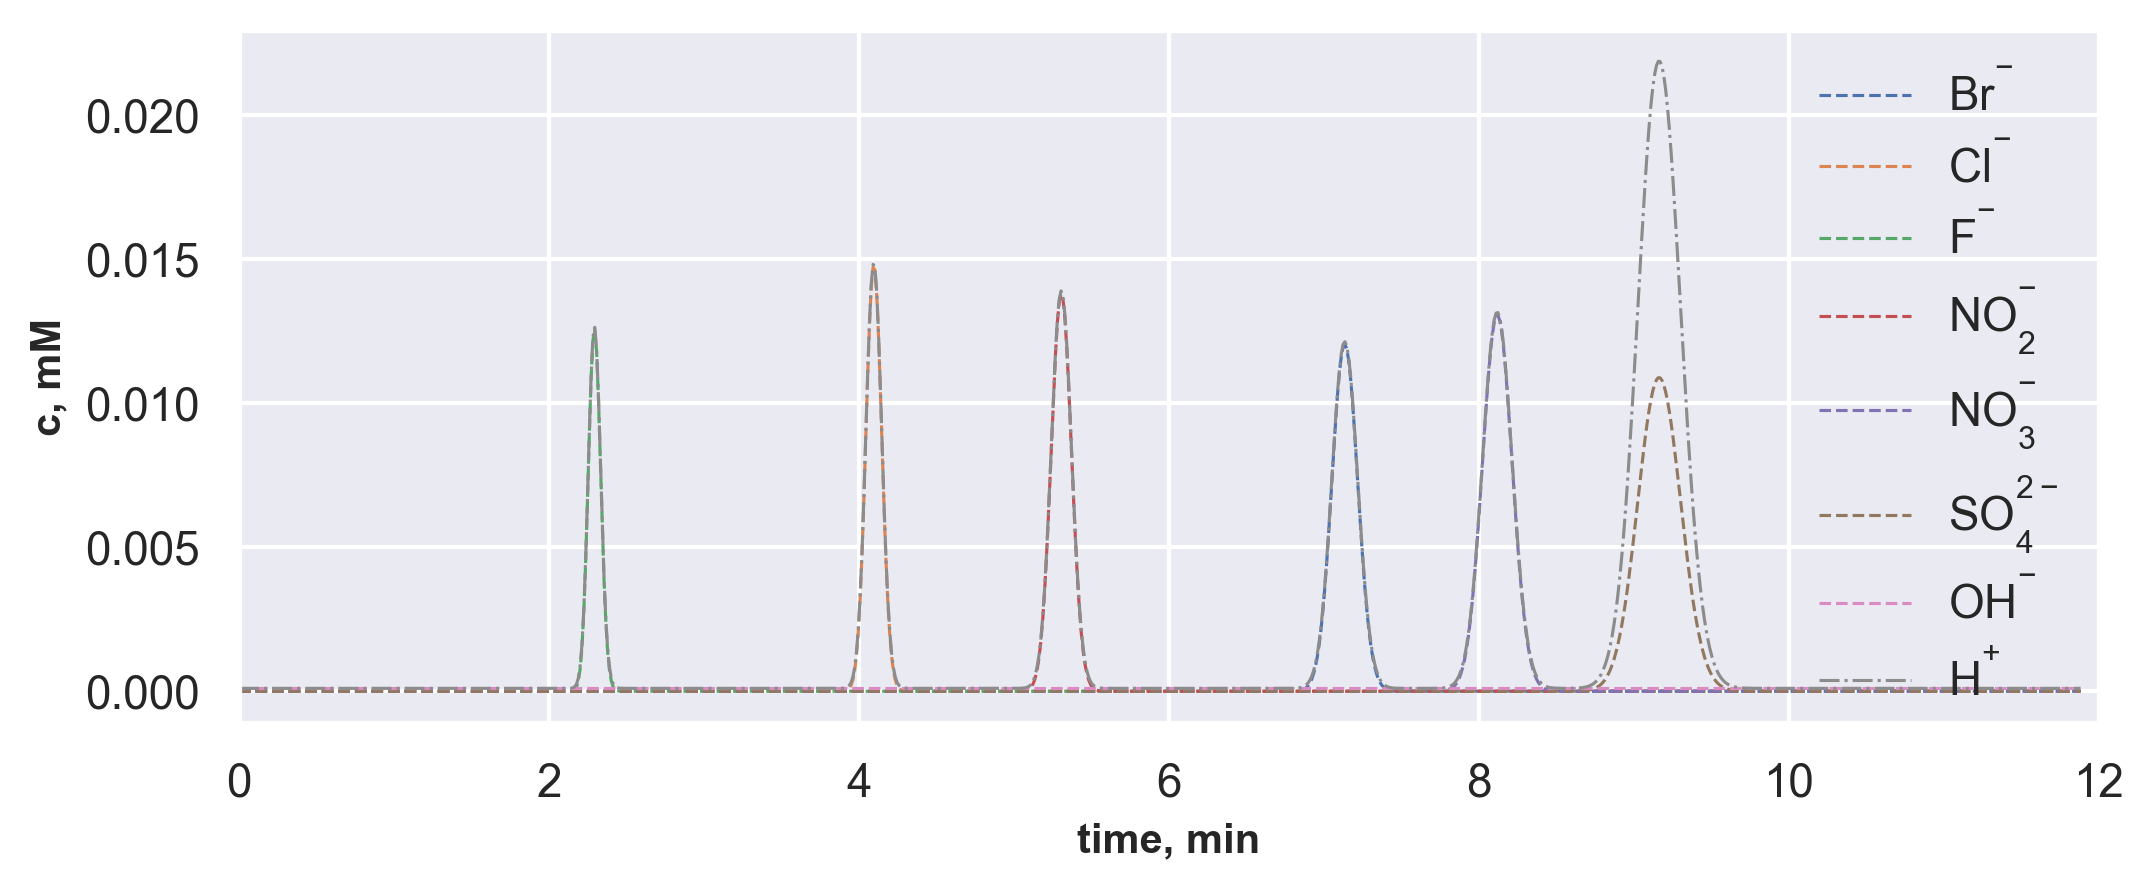

In [10]:
# Use the bound method .plot to show the effluent composition
detector.plot()

In [11]:
# For more realistic visualization, use detector.get_signals
df = detector.get_signals(signal_type='concentration')
x, y = df['time'], df['signal']

[(0.0, 12.0)]

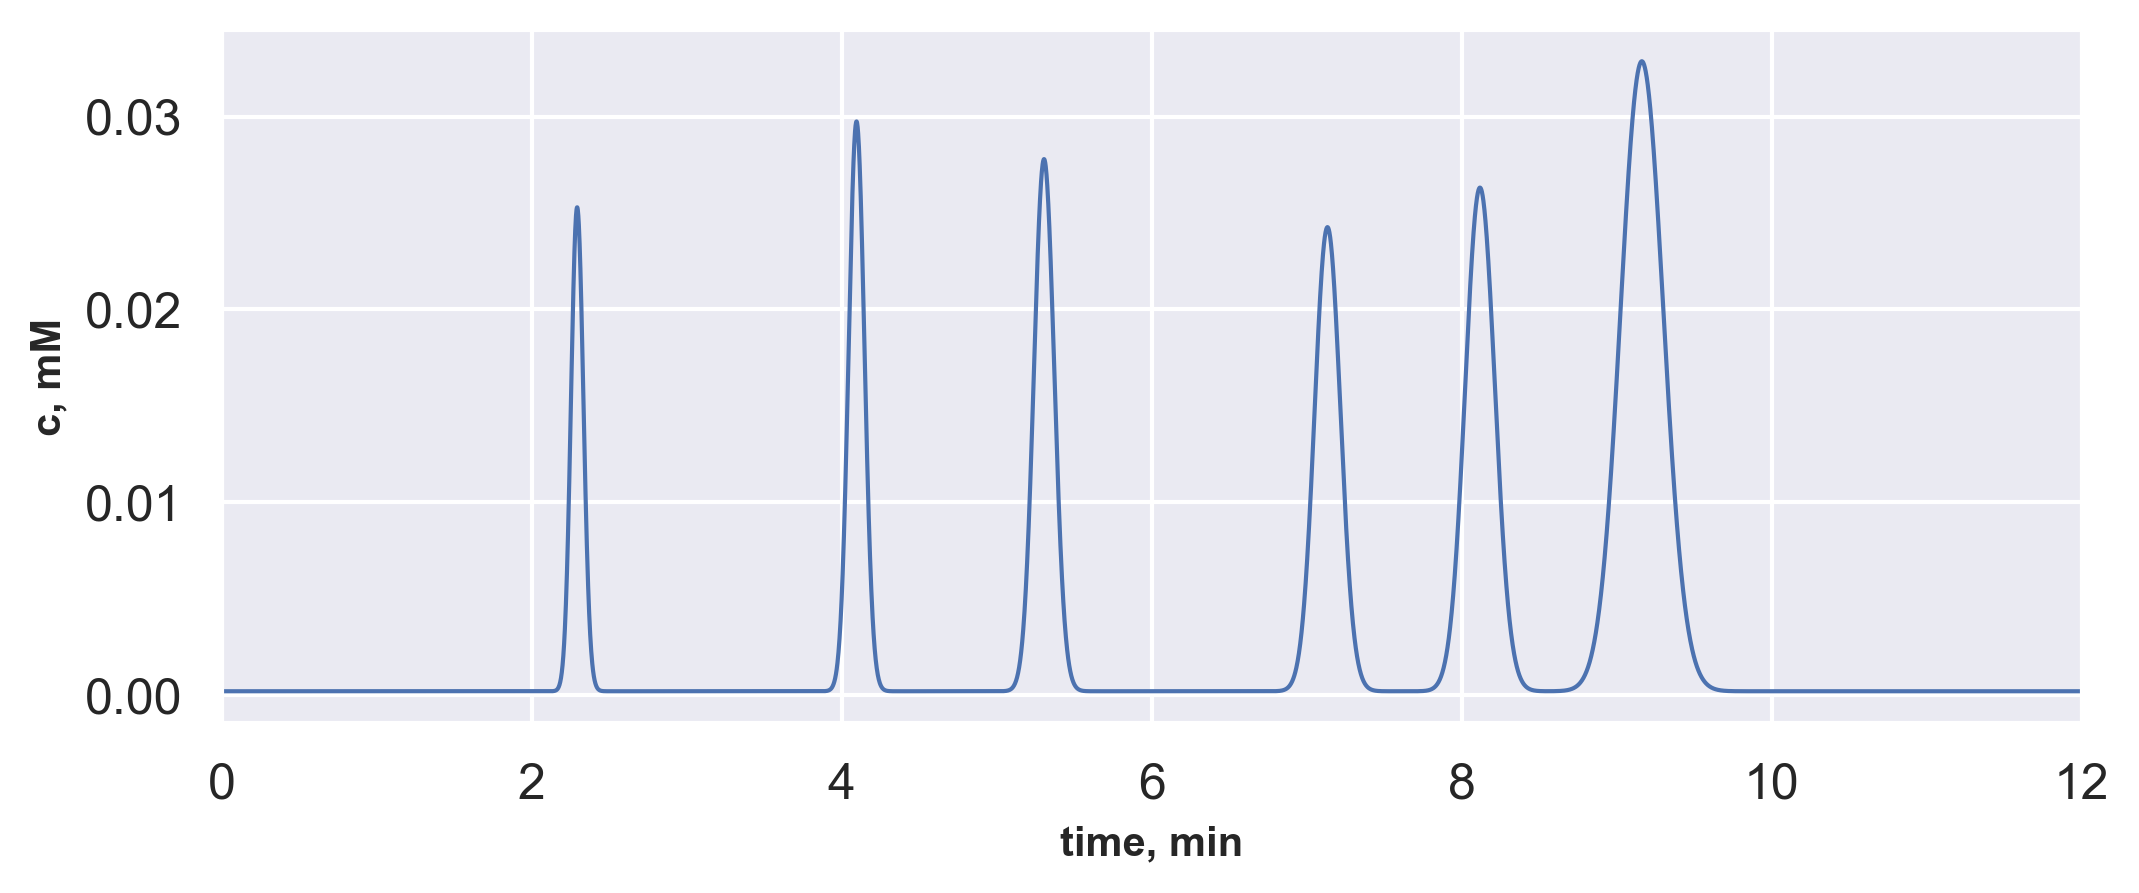

In [12]:
import matplotlib.pyplot as plt
from pyIClab.beadedbag import mpl_custom_rcconfig
plt.rcParams.update(mpl_custom_rcconfig)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('time, min', fontsize=10, fontweight='bold')
ax.set_ylabel('c, mM', fontsize=10, fontweight='bold')
ax.set(xlim=(0, 12))

Deconvolving mixture: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


[<Figure size 2400x900 with 1 Axes>,
 <Axes: xlabel='time', ylabel='signal (baseline corrected)'>]

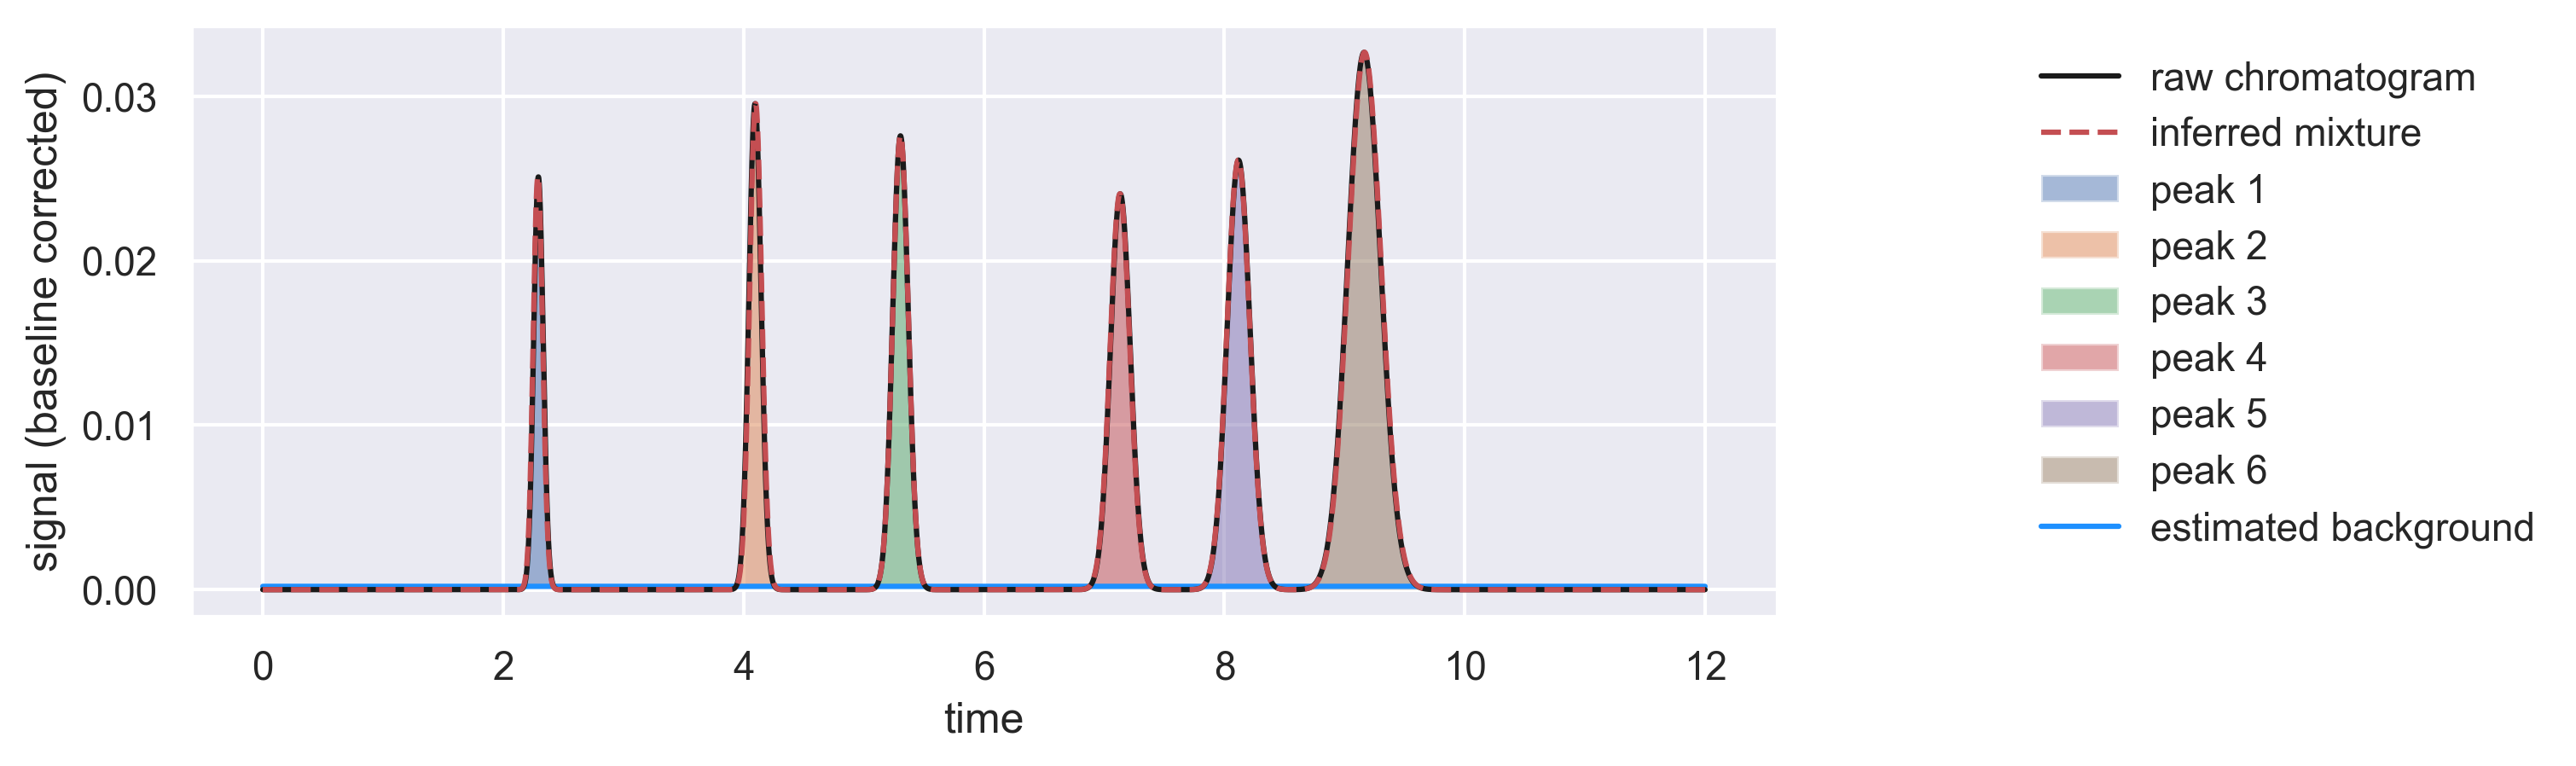

In [13]:
# hplc-py is a third-party python package for peak process and quantification.
# Assume you have hplc-py installed.
# Now we are using it to verify the IC output.
import hplc
import numpy as np
import pandas as pd

chrom = hplc.quant.Chromatogram(df)
pfd = peak_fit_data = chrom.fit_peaks(correct_baseline=True)
pfd['plates'] = ((pfd['retention_time'] / pfd['scale'])**2).apply(int)
chrom.show()

In [14]:
pfd

,retention_time,scale,skew,amplitude,area,peak_id,plates
0,2.27,0.044775,0.685943,0.002510,1.505618,1,2570
0,4.08,0.055037,0.543781,0.003766,2.259353,2,5495
0,5.28,0.070464,0.530851,0.004518,2.710028,3,5614
0,7.10,0.089275,0.512122,0.005015,3.008182,4,6324
0,8.08,0.102761,0.511593,0.006265,3.758080,5,6182
0,9.11,0.149575,0.556625,0.011281,6.767371,6,3709
